<font size = "6">
<b>Statistics</b>
</font>

Table of Contents
<div id="toc"></div>

<img src="./image_files/data_model.png", width = 300>

# 1. Populations and Samples
- A **population** includes all the elements from a set of data

- A **parameter** is a quantity computed from a population
    - mean, $\mu$
    - variance, $\sigma^2$


- A **sample** is a subset of the population.
    - one or more observations

- A **statistic** is a quantity computed from a sample
    - sample mean, $\bar{x}$
    - sample variance, $𝑠^2$
    - sample correlation, $𝑆_{𝑥𝑦}$

# 2. Inference
- True population or process is modeled probabilistically.
- Sampling supplies us with realizations from probability model.
- Compute something, but recognize that we could have just as easily gotten a different set of realizations.

<br>
<img src = "image_files\inference.png" style="border:1px solid black", width = 600>
<br>

<br>
<img src = "image_files\inference_multiples.png" style="border:1px solid black", width = 600>
<br>

- We want to infer the characteristics of the true probability model from our **one** sample.

<br>
<img src = "image_files\inference_one.png" style="border:1px solid black", width = 600>
<br>

# 3. Law of Large Numbers
- Sample mean converges to the population mean as sample size gets large

$$ \bar{x} \rightarrow \mu_x \qquad \text{as} \qquad m \rightarrow \infty$$

- True for any probability density functions

<br>
<img src = "image_files\law_of_large_numbers.png" style="border:1px solid black", width = 600>
<br>

- [wikipedia](http://en.wikipedia.org/wiki/Law_of_large_numbers)

## 3.1. Sample Mean and Sample Size

- sample mean and sample variance

$$
\begin{align}
\bar{x} &=\frac{x_1+x_2+...+x_m}{m}\\
s^2 &=\frac{\sum_{i=1}^{m}(x_i-\bar{x})^2}{m-1}
\end{align}
$$

- suppose $x \sim U[0,1]$

In [1]:
%% Statistics
% numerically understand statistics

m = 100;
x = rand(m,1);

xbar = 1/m*sum(x)                   % sample mean or
mean(x)

varbar = 1/(m-1)*sum((x-xbar).^2)   % sample variance or
var(x)

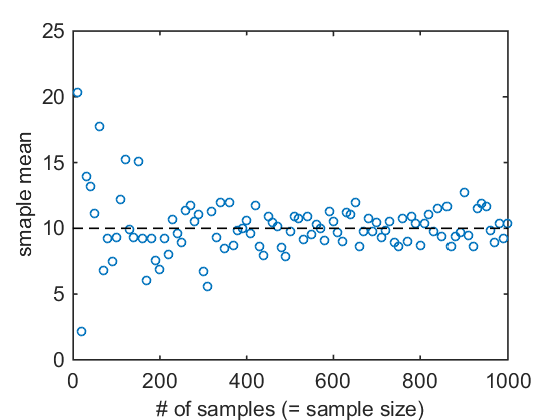

In [5]:
%% various sample size m

m = 10:10:1000;
means = zeros(1,length(m));

for i = 1:length(m)
    x = normrnd(10,30,1,m(i));          
    means(1,i) = mean(x);
end

plot(m,means(1,:),'o','markersize',4); hold on
plot([0 max(m)],[10 10],'k--'); hold off

xlabel('# of samples (= sample size)','fontsize',10)
ylabel('smaple mean','fontsize',10)

# 4. Central limit theorem

- <font color='red'>Sample mean</font> (not samples) will be approixmatedly normally distributed as $N \rightarrow \infty$
- More samples provide more confidence (or less uncertainty)
- Note: true regardless of any distribution of population

$$ \bar{x} \rightarrow N\left(\mu_x,\left(\frac{\sigma}{\sqrt{N}}\right)^2 \right) $$

<br>
<img src = "image_files\central_limit_theorem.png" style="border:1px solid black", width = 600>
<br>

- [wikipedia](http://en.wikipedia.org/wiki/Central_limit_theorem)

## 4.1. Variance Gets Smaller as $m$ is Larger
- Seems approximately Gaussian distributed 
- numerically demostrate that sample mean follows the Gaussin distribution

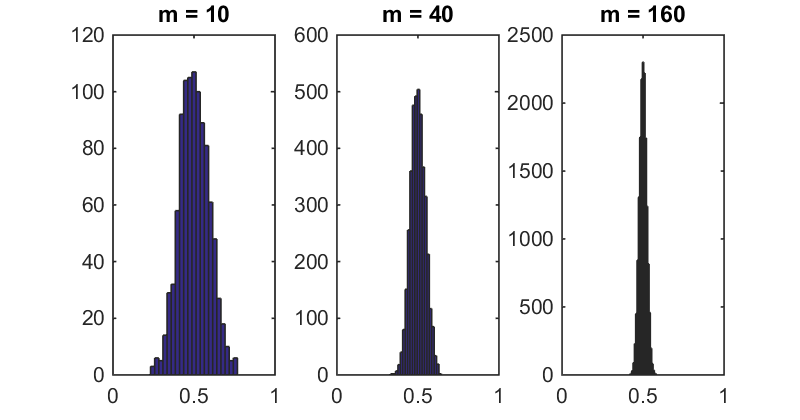

In [6]:
%plot -s 800,420
N = 100;

m = [10 40 160];    % sample of size m

S1 = [];     % sample mean (or sample average)
S2 = [];
S3 = [];

for i = 1:N
    S1 = [S1 mean(rand(m(1)))];
    S2 = [S2 mean(rand(m(2)))];
    S3 = [S3 mean(rand(m(3)))];
end

subplot(1,3,1), hist(S1,21), xlim([0 1]),   title(['m = ',num2str(m(1))])   %set(gca,'ytick',[])
subplot(1,3,2), hist(S2,21), xlim([0 1]),   title(['m = ',num2str(m(2))])   %set(gca,'ytick',[])
subplot(1,3,3), hist(S3,21), xlim([0 1]),   title(['m = ',num2str(m(3))])   %set(gca,'ytick',[])

# 5. How to Generate Random Numbers (Samples or data)
- Data sampled from population/process/generative model

In [13]:
%% random number generation (1D)
m = 1000;

% uniform distribution U(0,1)
x1 = rand(1,m);

% uniform distribution U(a,b)
a = 1;  
b = 5;
x2 = a + (b-a).*rand(1,m);

% standard normal (Gaussian) distribution N(0,1^2)
x3 = randn(1,m);

% normal distribution N(5,2^2)
x4 = 5 + 2.*randn(1,m);

% random integers
x5 = randi([1 6],1,m);

## Histogram : graphical representation of data distribution

$ \Rightarrow$ rough sense of density of data

<br>
<img src="image_files/histogram.png" width = 300>
<br>

# 5. Multivariate Statistics


$$x^{(i)} = \begin{bmatrix}x_1^{(i)} \\ x_2^{(i)}\\ \vdots \end{bmatrix}, \quad X = \begin{bmatrix} -& (x^{(i)})^T & -\\ - & (x^{(i)})^T & -\\ & \vdots & \\ - & (x^{(m)})^T & -\end{bmatrix}$$

- $m$ observations $\left(x^{(i)}, x^{(2)}, \cdots , x^{(m)}\right)$

$$ 
\begin{align*}
\text{sample mean} \; \bar x &= \frac{x^{(1)} + x^{(2)} + \cdots + x^{(m)}}{m} = \frac{1}{m} \sum\limits_{i=1}^{m}x^{(i)} \\
\text{sample variance} \; S^2 &= \frac{1}{m-1} \sum\limits_{i=1}^{m}(x^{(i)} - \bar x)^2 \\
(\text{Note: } &\text{population variance} \; \sigma^2 = \frac{1}{N}\sum\limits_{i=1}^{N}(x^{(i)} - \mu)^2
\end{align*}
$$


## 5.1. Two random variables


$$\begin{align*} \text{Sample Variance} : S_x &= \frac{1}{m-1} \sum\limits_{i=1}^{m}\left(x^{(i)}-\bar x\right)^2 \\
 \text{Sample Covariance} : S_{xy} &= \frac{1}{m-1} \sum\limits_{i=1}^{m}\left(x^{(i)}-\bar x\right)\left(y^{(i)}-\bar y \right)\\
\text{Sample Covariance matrix} : S &= 
\begin{bmatrix} 
S_x & S_{xy} & \cdots \\
S_{yx} & S_y & \\
\vdots & & \ddots
\end{bmatrix}\\
 \text{sample correlation coefficient} :
r &= \frac{S_{xy}}{ \sqrt {S_{xx}\cdot S_{yy}} }
\end{align*}$$

- strength of __linear__ relationship between two variables, $x$ and $y$

$$x_1 \leq x_2 \leq \cdots \leq x_n$$

$$y_1 \leq y_2 \leq \cdots \leq y_n$$


<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            $$ \begin{align*} & \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}, \begin{bmatrix} x_2 \\ y_2 \end{bmatrix}, \cdots, \begin{bmatrix} x_n \\ y_n \end{bmatrix} \\ \\ \\ \\
            & \begin{bmatrix} x_1 \\ y_n \end{bmatrix}, \begin{bmatrix} x_2 \\ y_{n-1} \end{bmatrix}, \cdots, \begin{bmatrix} x_n \\ y_1 \end{bmatrix} \\ \\ \\ \\
            & \begin{bmatrix} x_i \\ y_j \end{bmatrix} \text{ random selection} \end{align*}$$
        </td>
        <td width = 48%>
            <img src="./image_files/relationship.png" width = 320>
        </td>
    </tr>
</table>

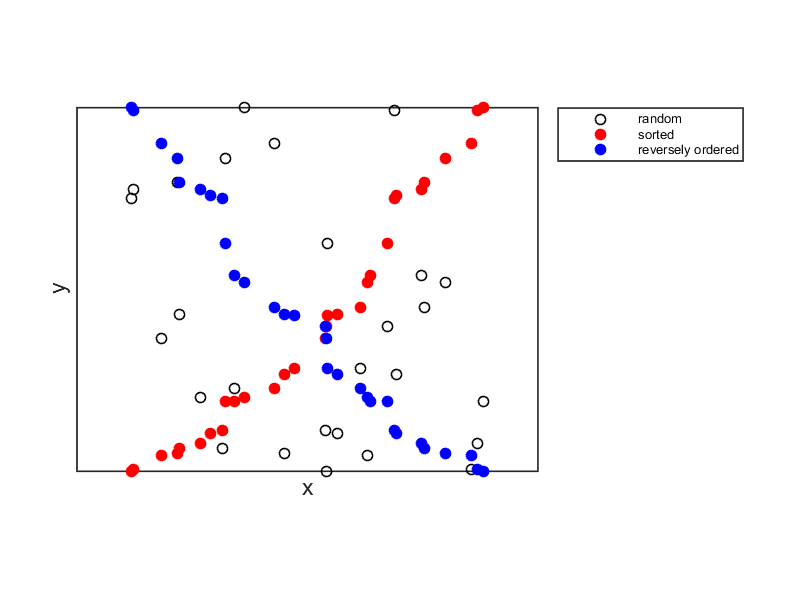

ans =

    1.0000   -0.3776
   -0.3776    1.0000


ans =

    1.0000    0.9785
    0.9785    1.0000


ans =

    1.0000   -0.9826
   -0.9826    1.0000


ans =

    0.0761   -0.0313
   -0.0313    0.0902


ans =

    0.0761    0.0811
    0.0811    0.0902


ans =

    0.0761   -0.0814
   -0.0814    0.0902


V =

   -0.7371    0.6758
    0.6758    0.7371


D =

    0.0018         0
         0    0.1646

In [28]:
%% correlation

m = 30;
x = rand(1,m);
y = rand(1,m);

%x = randn(1,m);
%y = 3*randn(1,m);

xo = sort(x);
yo = sort(y);
yor = sort(y,2,'descend');


figure(19),  clf
plot(x,y,'ko','markersize',5),  hold on
plot(xo,yo,'ro','markerfacecolor','r','markersize',5)
plot(xo,yor,'bo','markerfacecolor','b','markersize',5),  hold off

% axis([0 1 0 1]),    axis square
%axis([-5 5 -5 5]),    axis square
axis equal
set(gca,'xtick',[]),    set(gca,'ytick',[])
xlabel('x')
ylabel('y')
leg = legend('random','sorted','reversely ordered');
set(leg,'fontsize',6,'location','bestoutside')

%
corrcoef(x,y)
corrcoef(xo,yo)
corrcoef(xo,yor)

cov(x,y)
cov(xo,yo)
cov(xo,yor)

[V D] = eig(cov(xo,yo))

**m = 1000**
- uniform pdf

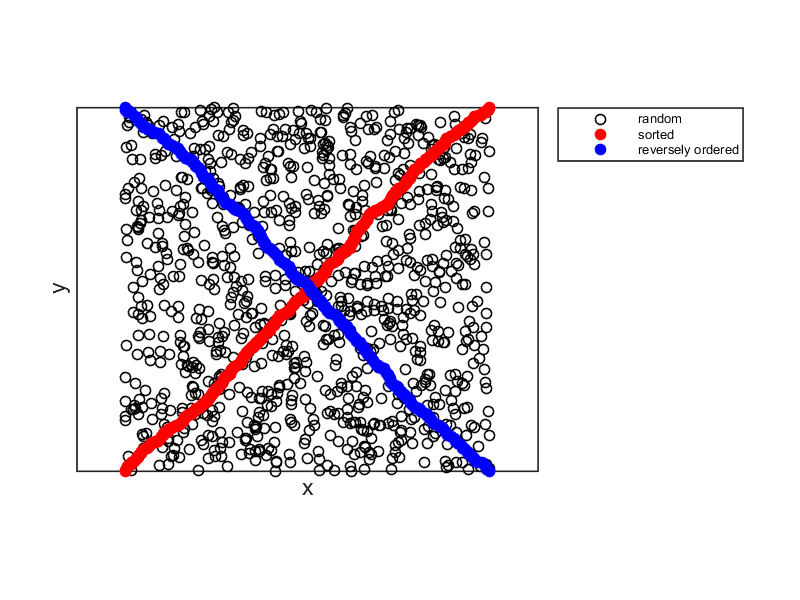

ans =

    1.0000    0.0054
    0.0054    1.0000


ans =

    1.0000    0.9992
    0.9992    1.0000


ans =

    1.0000   -0.9992
   -0.9992    1.0000


ans =

    0.0793    0.0004
    0.0004    0.0864


ans =

    0.0793    0.0827
    0.0827    0.0864


ans =

    0.0793   -0.0827
   -0.0827    0.0864


V =

   -0.7222    0.6917
    0.6917    0.7222


D =

    0.0001         0
         0    0.1657

In [29]:
%% correlation

m = 1000;
x = rand(1,m);
y = rand(1,m);

%x = randn(1,m);
%y = 3*randn(1,m);

xo = sort(x);
yo = sort(y);
yor = sort(y,2,'descend');


figure(19),  clf
plot(x,y,'ko','markersize',5),  hold on
plot(xo,yo,'ro','markerfacecolor','r','markersize',5)
plot(xo,yor,'bo','markerfacecolor','b','markersize',5),  hold off

% axis([0 1 0 1]),    axis square
%axis([-5 5 -5 5]),    axis square
axis equal
set(gca,'xtick',[]),    set(gca,'ytick',[])
xlabel('x')
ylabel('y')
leg = legend('random','sorted','reversely ordered');
set(leg,'fontsize',6,'location','bestoutside')

%
corrcoef(x,y)
corrcoef(xo,yo)
corrcoef(xo,yor)

cov(x,y)
cov(xo,yo)
cov(xo,yor)

[V D] = eig(cov(xo,yo))

- normal pdf

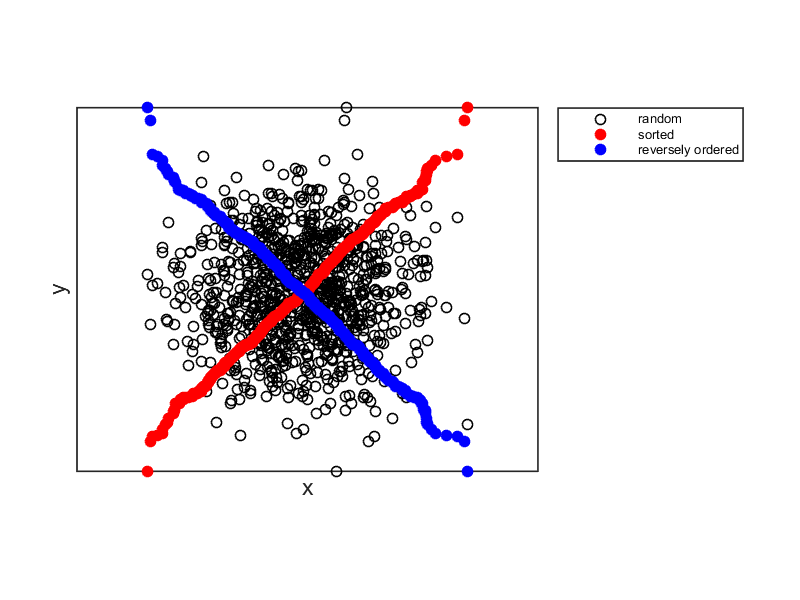

ans =

    1.0000   -0.0180
   -0.0180    1.0000


ans =

    1.0000    0.9986
    0.9986    1.0000


ans =

    1.0000   -0.9980
   -0.9980    1.0000


ans =

    1.0459   -0.0180
   -0.0180    0.9586


ans =

    1.0459    0.9999
    0.9999    0.9586


ans =

    1.0459   -0.9993
   -0.9993    0.9586


V =

    0.6915   -0.7224
   -0.7224   -0.6915


D =

    0.0014         0
         0    2.0031

In [30]:
%% correlation

m = 1000;
x = randn(1,m);
y = randn(1,m);

%x = randn(1,m);
%y = 3*randn(1,m);

xo = sort(x);
yo = sort(y);
yor = sort(y,2,'descend');


figure(19),  clf
plot(x,y,'ko','markersize',5),  hold on
plot(xo,yo,'ro','markerfacecolor','r','markersize',5)
plot(xo,yor,'bo','markerfacecolor','b','markersize',5),  hold off

% axis([0 1 0 1]),    axis square
%axis([-5 5 -5 5]),    axis square
axis equal
set(gca,'xtick',[]),    set(gca,'ytick',[])
xlabel('x')
ylabel('y')
leg = legend('random','sorted','reversely ordered');
set(leg,'fontsize',6,'location','bestoutside')

%
corrcoef(x,y)
corrcoef(xo,yo)
corrcoef(xo,yor)

cov(x,y)
cov(xo,yo)
cov(xo,yor)

[V D] = eig(cov(xo,yo))

## 5.2. Correlation coefficient


- $+1 \rightarrow$ close to a straight line

- $-1 \rightarrow$ close to a straight line

- Indicate how close to a linear line, but

- No information on slope

$$0 \leq \left\lvert \text{ correlation coefficient } \right\rvert \leq 1$$

$$\hspace{1cm}\begin{array}{Icr}\leftarrow\\ (\text{uncorrelated})\end{array} 
\quad \quad \quad
\begin{array}{Icr}\rightarrow \\ (\text{linearly correlated})\end{array}$$


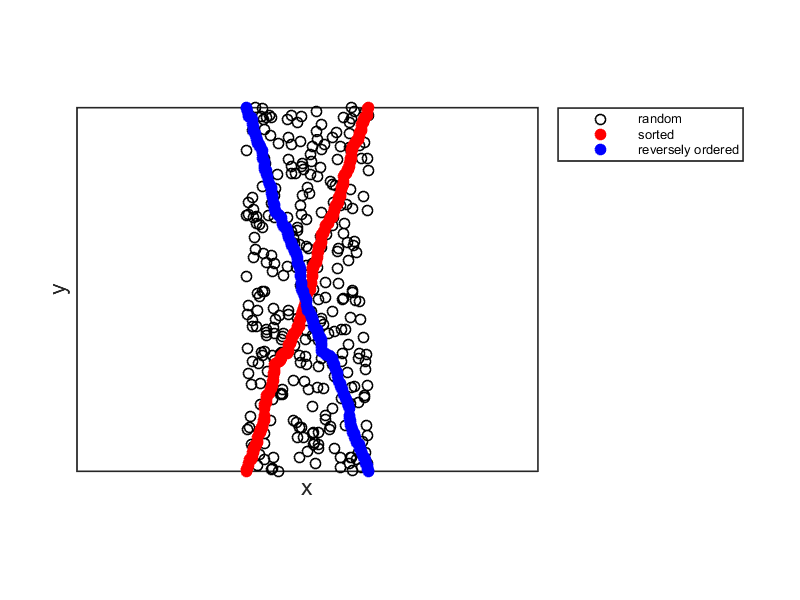

ans =

    1.0000   -0.0268
   -0.0268    1.0000


ans =

    1.0000    0.9982
    0.9982    1.0000


ans =

    1.0000   -0.9980
   -0.9980    1.0000


ans =

    0.0888   -0.0071
   -0.0071    0.7828


ans =

    0.0888    0.2631
    0.2631    0.7828


ans =

    0.0888   -0.2631
   -0.2631    0.7828


V =

   -0.9478    0.3188
    0.3188    0.9478


D =

    0.0003         0
         0    0.8713

In [31]:
%% correlation

m = 300;
x = rand(1,m);
y = 3*rand(1,m);

%x = randn(1,m);
%y = 3*randn(1,m);

xo = sort(x);
yo = sort(y);
yor = sort(y,2,'descend');


figure(19),  clf
plot(x,y,'ko','markersize',5),  hold on
plot(xo,yo,'ro','markerfacecolor','r','markersize',5)
plot(xo,yor,'bo','markerfacecolor','b','markersize',5),  hold off

% axis([0 1 0 1]),    axis square
%axis([-5 5 -5 5]),    axis square
axis equal
set(gca,'xtick',[]),    set(gca,'ytick',[])
xlabel('x')
ylabel('y')
leg = legend('random','sorted','reversely ordered');
set(leg,'fontsize',6,'location','bestoutside')

%
corrcoef(x,y)
corrcoef(xo,yo)
corrcoef(xo,yor)

cov(x,y)
cov(xo,yo)
cov(xo,yor)

[V D] = eig(cov(xo,yo))

## 5.3. Correlation Matrix

- Plots correlation coefficients among pairs of variables


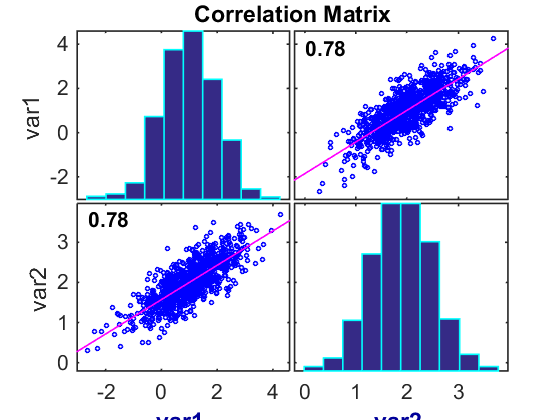

In [22]:
%% variable correlations
% plots showing correlations among pairs of variables
% correlation coefficient

corrplot(r')

## 5.4. Covariance Matrix

$$\sum = \begin{bmatrix} 
E[(X_1-\mu_1)(X_1-\mu_1)]& E[(X_1-\mu_1)(X_2-\mu_2)] & \cdots &E[(X_1-\mu_1)(X_n-\mu_n)]\\
E[(X_2-\mu_2)(X_1-\mu_1)]& E[(X_2-\mu_2)(X_2-\mu_2)] & \cdots &E[(X_2-\mu_2)(X_n-\mu_n)]\\
\vdots & \vdots & \ddots & \vdots\\
E[(X_n-\mu_n)(X_1-\mu_1)]& E[(X_n-\mu_n)(X_2-\mu_2)] & \cdots &E[(X_n-\mu_n)(X_n-\mu_n)]\\
\end{bmatrix}$$


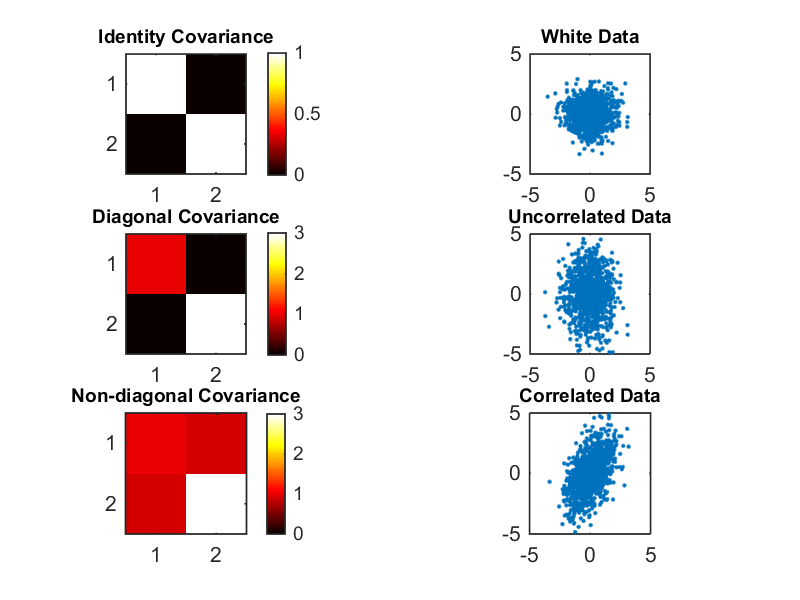

V2 =

     1     0
     0     1


D2 =

     1     0
     0     3


V3 =

   -0.9336    0.3583
    0.3583    0.9336


D3 =

    0.6546         0
         0    3.3454

In [42]:
%plot -s 800,600

mu = [0 0];
sigma1 = [1 0;
         0 1];

sigma2 = [1 0;
          0 3]; 

sigma3 = [1 0.9;
          0.9 3];

m = 1000;
r1 = mvnrnd(mu,sigma1,m);
r2 = mvnrnd(mu,sigma2,m);
r3 = mvnrnd(mu,sigma3,m);

figure(14),   clf
subplot(3,2,1), imagesc(sigma1),    axis image, colorbar,   colormap(hot),  caxis([0 1])     
title('Identity Covariance','fontsize',9)
subplot(3,2,3), imagesc(sigma2),    axis image, colorbar,   colormap(hot),  caxis([0 3]) 
title('Diagonal Covariance','fontsize',9)
subplot(3,2,5), imagesc(sigma3),    axis image, colorbar,   colormap(hot),  caxis([0 3]) 
title('Non-diagonal Covariance','fontsize',9)

subplot(3,2,2),  plot(r1(:,1),r1(:,2),'.'),    axis([-5 5 -5 5]),   axis square
title('White Data','fontsize',9)
subplot(3,2,4),  plot(r2(:,1),r2(:,2),'.'),    axis([-5 5 -5 5]),   axis square
title('Uncorrelated Data','fontsize',9)
subplot(3,2,6),  plot(r3(:,1),r3(:,2),'.'),    axis([-5 5 -5 5]),   axis square
title('Correlated Data','fontsize',9)

%
[V2 D2] = eig(sigma2)
[V3 D3] = eig(sigma3)

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>